In [37]:
import numpy as np
import matplotlib.pyplot as plt
L = 0.529 
i = 2000 # numver of grid
x = np.linspace(-L/2,L/2,i)
I = np.eye(i) # create an identity matrix of n size

def matrix(n):
    mat = np.zeros((n,n)) # create an array of n*n of zeros
    # add ones to the subdiagonal and super diagonal of the matrix
    i,j = np.indices(mat.shape)
    mat[i==j-1] = 1
    mat[i==j+1] = 1
    return mat
    
I_off_diag = matrix(i)    

Laplacian = (-2 * I + I_off_diag) / ((x[1] - x[0]) ** 2)

Hamiltonian = -Laplacian / 2

# Compute the eigenvalues and eigenvectors
eigenvalues,eigenvectors = np.linalg.eig(Hamiltonian)
print(eigenvalues,eigenvectors)
sorted_indices = np.argsort(eigenvalues)
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]# Sort the eigenvectors according to the sorted eigenvalues
print(eigenvalues_sorted[:7]) #print first seven eigenvalues

[28426081.34993324 28429116.63919552 28432117.05067245 ...
   186302.05332815   476461.29913446  2620053.79908289] [[ 0.00430489 -0.00425571  0.00420652 ...  0.00509022 -0.0080986
   0.01825195]
 [-0.00852959  0.00843396 -0.00833824 ...  0.01004763 -0.01565675
   0.02980605]
 [ 0.0125954  -0.01245868  0.01232169 ...  0.01474285 -0.02217007
   0.03042234]
 ...
 [-0.0125954  -0.01245868 -0.01232169 ...  0.01474285 -0.02217007
  -0.03042234]
 [ 0.00852959  0.00843396  0.00833824 ...  0.01004763 -0.01565675
  -0.02980605]
 [-0.00430489 -0.00425571 -0.00420652 ...  0.00509022 -0.0080986
  -0.01825195]]
[ 17.59907035  70.39623803 158.3913729  281.58425803 439.9745898
 633.56197776 862.34594474]


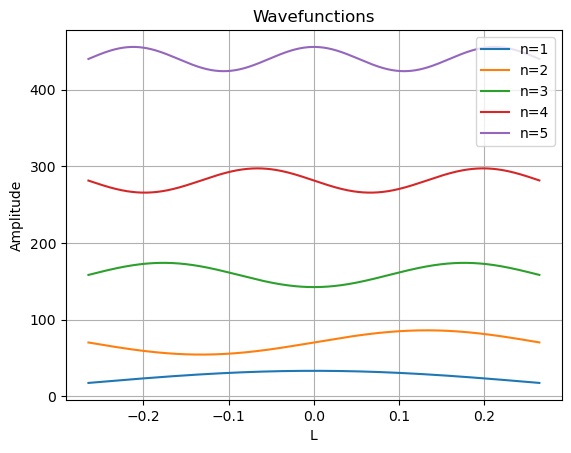

In [73]:
for n in range(5):
    y = -500*eigenvectors_sorted[:, n] + eigenvalues_sorted[n]
    plt.plot(x, y, label=f'n={n+1}')
plt.legend()
plt.xlabel('L')
plt.ylabel('Amplitude')
plt.title('Wavefunctions')
plt.grid(True)
plt.show()